In [9]:
import pandas as pd

# 指定你的 CSV 檔案路徑
csv_file_path = 'BNBfunding_rate.csv'

# 讀取 CSV 檔案
df = pd.read_csv(csv_file_path)

# 顯示 DataFrame 的前幾行
print(df.head())

   Unnamed: 0   symbol      rate                 time
0           0  BNBUSDT  0.000000  2020-02-10 16:00:00
1           1  BNBUSDT  0.003046  2020-02-11 00:00:00
2           2  BNBUSDT  0.001616  2020-02-11 08:00:00
3           3  BNBUSDT  0.002613  2020-02-11 16:00:00
4           4  BNBUSDT  0.001556  2020-02-12 00:00:00


In [1]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from pathlib import Path

# Base URL for Binance API
base_url = 'https://api.binance.com'

# Symbol to fetch
symbol = 'BNBUSDT'

# Function to convert datetime to timestamp in milliseconds
def timestamp_to_int(dt):
    return int(datetime.timestamp(dt) * 1000)

# Start and end time for data fetching
start_time = timestamp_to_int(datetime(2020, 1, 1))
end_time = timestamp_to_int(datetime(2023, 12, 13))

# Function to get historical klines and append to DataFrame
def get_historical_klines(df, start_time):
    endpoint = '/api/v3/klines'
    interval = '8h'
    params = {
        'symbol': symbol,
        'interval': interval,
        'startTime': start_time,
        'endTime': start_time + 8 * 60 * 60 * 1000,  # 8 hours in milliseconds
        'limit': 1000
    }
    url = base_url + endpoint
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        klines_df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
        klines_df['timestamp'] = pd.to_datetime(klines_df['timestamp'], unit='ms')
        df = pd.concat([df, klines_df], ignore_index=True)
        print(f'Symbol: {symbol}, Fetched {len(klines_df)} klines from {klines_df["timestamp"].min()} to {klines_df["timestamp"].max()}')
    else:
        print(f'Error: {response.status_code}')

    return df

# Initialize DataFrame
df = pd.DataFrame()

# Fetch data in loop
while start_time < end_time:
    df = get_historical_klines(df, start_time)
    start_time += 8 * 60 * 60 * 1000  # Move to next 8-hour interval

# Print or process the DataFrame as needed
print(df)

# Save to CSV
filepath = Path('C:/Quant/BNB8_price.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)


Symbol: BNBUSDT, Fetched 2 klines from 2019-12-31 16:00:00 to 2020-01-01 00:00:00
Symbol: BNBUSDT, Fetched 2 klines from 2020-01-01 00:00:00 to 2020-01-01 08:00:00
Symbol: BNBUSDT, Fetched 2 klines from 2020-01-01 08:00:00 to 2020-01-01 16:00:00
Symbol: BNBUSDT, Fetched 2 klines from 2020-01-01 16:00:00 to 2020-01-02 00:00:00
Symbol: BNBUSDT, Fetched 2 klines from 2020-01-02 00:00:00 to 2020-01-02 08:00:00
Symbol: BNBUSDT, Fetched 2 klines from 2020-01-02 08:00:00 to 2020-01-02 16:00:00
Symbol: BNBUSDT, Fetched 2 klines from 2020-01-02 16:00:00 to 2020-01-03 00:00:00
Symbol: BNBUSDT, Fetched 2 klines from 2020-01-03 00:00:00 to 2020-01-03 08:00:00
Symbol: BNBUSDT, Fetched 2 klines from 2020-01-03 08:00:00 to 2020-01-03 16:00:00
Symbol: BNBUSDT, Fetched 2 klines from 2020-01-03 16:00:00 to 2020-01-04 00:00:00
Symbol: BNBUSDT, Fetched 2 klines from 2020-01-04 00:00:00 to 2020-01-04 08:00:00
Symbol: BNBUSDT, Fetched 2 klines from 2020-01-04 08:00:00 to 2020-01-04 16:00:00
Symbol: BNBUSDT,

Year 2020 - Positive Ratio: 37.70%
Year 2021 - Positive Ratio: 41.37%
Year 2022 - Positive Ratio: 0.46%
Year 2023 - Positive Ratio: 22.47%


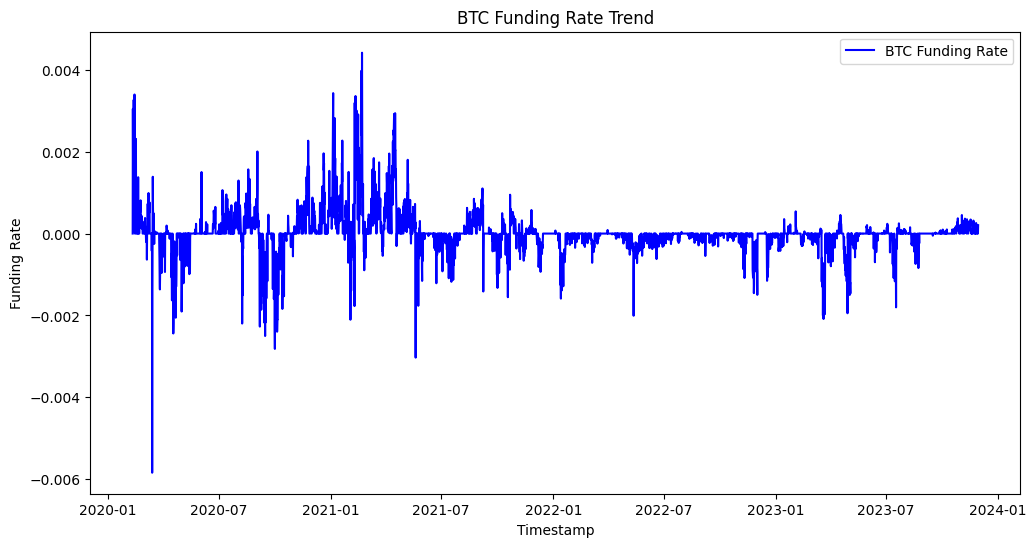

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設你上傳的檔案名稱為 "BNBfunding_rate.csv"
file_name = "BNBfunding_rate.csv"

# 讀取 CSV 檔案
df = pd.read_csv(file_name)

# 將 'time' 轉換為 datetime 格式
df['time'] = pd.to_datetime(df['time'])

# 新增一列 'positive'，資金費率為正時為True，否則為False
df['positive'] = df['rate'] > 0

# 按年份分組，計算每年資金費率為正和負的比例
yearly_ratios = df.groupby(df['time'].dt.year)['positive'].mean()

# 繪製走勢圖
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['time'], df['rate'], label='BTC Funding Rate', color='blue')

ax.set_title('BTC Funding Rate Trend')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Funding Rate')
ax.legend()

# 顯示每年的資金費率為正和負的比例
for year, ratio in yearly_ratios.items():
    print(f'Year {year} - Positive Ratio: {ratio:.2%}')

plt.show()


Average Negative Duration: 31.49526813880126 hours
Average Positive Duration: 67.93690851735016 hours


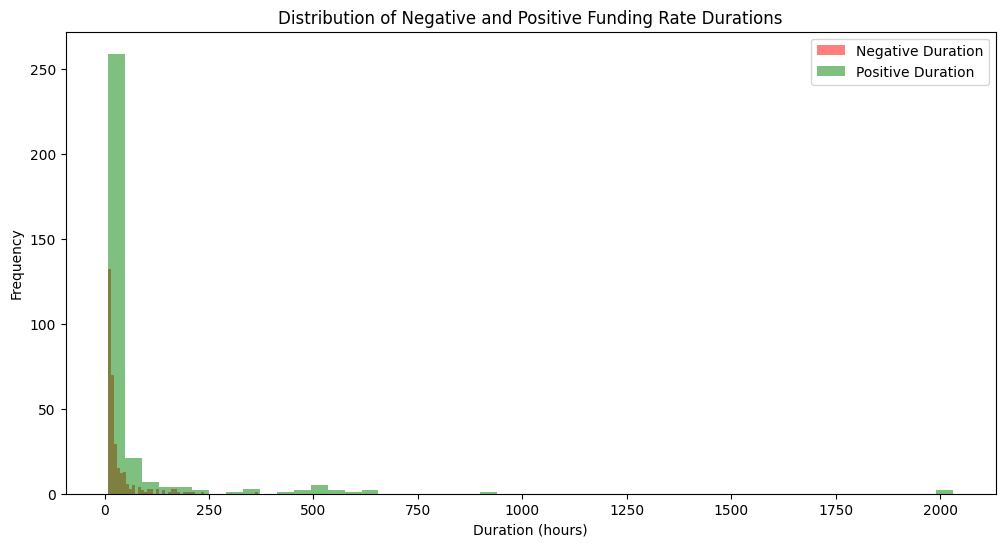

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 讀取 CSV 檔案
df = pd.read_csv('BNBfunding_rate.csv')
df['time'] = pd.to_datetime(df['time'])

# 設定 starttime 和 endtime
starttime = datetime(2020, 1, 1)
endtime = datetime(2023, 11, 10)
negative_periods = []  
positive_periods = []  
current_negative_start = None  
current_positive_start = None  
for index, row in df.iterrows():
    if starttime <= row['time'] <= endtime:
        if row['rate'] < 0:
            if current_negative_start is None:
                current_negative_start = row['time']
            if current_positive_start is not None:
                positive_duration = row['time'] - current_positive_start
                positive_periods.append(positive_duration.total_seconds() / 3600)  
                current_positive_start = None  
        else:
            if current_positive_start is None:
                current_positive_start = row['time']
            if current_negative_start is not None:
                negative_duration = row['time'] - current_negative_start
                negative_periods.append(negative_duration.total_seconds() / 3600)  
                current_negative_start = None  
average_negative_duration = sum(negative_periods) / len(negative_periods) if negative_periods else 0
average_positive_duration = sum(positive_periods) / len(positive_periods) if positive_periods else 0
print(f"Average Negative Duration: {average_negative_duration} hours")
print(f"Average Positive Duration: {average_positive_duration} hours")
plt.figure(figsize=(12, 6))
plt.hist(negative_periods, bins=50, alpha=0.5, label='Negative Duration', color='red')
plt.hist(positive_periods, bins=50, alpha=0.5, label='Positive Duration', color='green')
plt.title('Distribution of Negative and Positive Funding Rate Durations')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [61]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Binance API基礎URL和交易對
base_url = 'https://binance.com'
symbol = "BNBUSDT"

# 假設手續費 我還沒有仔細算
spot_rate = 0.001
future_rate = 0.0005
slippage_rate = 0.001  # 滑點率

def get_historical_klines(interval, start_time, end_time):
    endpoint = '/api/v3/klines'
    params = {
        'symbol': symbol,
        'interval': interval,
        'startTime': int(start_time.timestamp() * 1000),
        'endTime': int(end_time.timestamp() * 1000),
        'limit': 1000
    }
    url = base_url + endpoint
    response = requests.get(url, params=params)
    data = response.json()

    # DataFrame
    df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df

def get_historical_contract_klines(interval, start_time, end_time):
    endpoint = '/api/v1/klines'
    params = {
        'symbol': symbol,
        'interval': interval,
        'startTime': int(start_time.timestamp() * 1000),
        'endTime': int(end_time.timestamp() * 1000),
        'limit': 1000
    }
    url = base_url + endpoint
    response = requests.get(url, params=params)
    data = response.json()

    # DataFrame
    df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df

# BNBfundingrate
def get_funding_rate(start_time, end_time):
    file_name = "BNBfunding_rate.csv"
    # 讀取 CSV 檔案
    df = pd.read_csv(file_name)
    df['time'] = pd.to_datetime(df['time'])

    # 篩選出在指定時間區間的資料
    filtered_df = df[(df['time'] >= start_time) & (df['time'] < end_time)]
    return filtered_df

#策略
def backtest(start_time, end_time):
    klines_df = get_historical_klines('8h', start_time, end_time)
    klines_contract_df = get_historical_contract_klines('8h', start_time, end_time)
    funding_rate_df = get_funding_rate(start_time, end_time)
    average_time = 31.49526813880126
    # 初始化資金
    capital = 10000
    spot_position = 0
    futures_short_position = 0
    in_short_trade = False
    in_long_trade = False
    trade_start_time = None
    last_exit_capital = 0
    slippage_cost = 0
    continued_time = 0
    
    for index, row in funding_rate_df.iterrows():
        current_time = row['time']
        funding_rate = row['rate']

        #計算資金費率為負的持續時間
        if funding_rate < 0:
           continued_time += 8
        else:
           continued_time = 0
        
        #處理數據缺失的情況
        if spot_position != 0 or futures_short_position != 0:
            current_kline = klines_df[klines_df['timestamp'] == current_time]
            eight_hours_ago = current_time - timedelta(hours=8)
            eight_hours_ago_kline = klines_df[klines_df['timestamp'] == eight_hours_ago]
    
            if not current_kline.empty and not eight_hours_ago_kline.empty:
              current_price = float(current_kline['close'].values[0])
              eight_hours_ago_price = float(eight_hours_ago_kline['close'].values[0])
            else:
              # 如果數據不存在，假設八小時前的價格為現在的價格
              current_price = current_price
              eight_hours_ago_price = current_price
              print("Assuming eight hours ago price is the same as the current price.")
            current_contract_kline = klines_contract_df[klines_contract_df['timestamp'] == current_time]
            eight_hours_ago_contract_kline = klines_df[klines_df['timestamp'] == eight_hours_ago]
            
            if not current_contract_kline.empty and not eight_hours_ago_contract_kline.empty:
              current_contract_price = float(current_contract_kline['close'].values[0])
              eight_hours_ago_contract_kline = float(eight_hours_ago_contract_kline['close'].values[0])
            else:
              # 如果數據不存在，假設八小時前的價格為現在的價格
              current_contract_price = current_contract_price
              eight_hours_ago_contract_price = current_contract_price
              print("Assuming eight hours ago price is the same as the current price.")
            spot_position = float(in_pos_s) * (current_price / in_price)
            futures_short_position = float(in_pos_c) * (in_contract_price / current_contract_price)
            slippage_cost = current_price * slippage_rate
        
        #入場的現貨和合約的價格
        if spot_position == 0:
            current_kline = klines_df[klines_df['timestamp'] == current_time]
            current_price = float(current_kline['close'].values[0])
            current_contract_kline = klines_contract_df[klines_contract_df['timestamp'] == current_time]
            current_contract_price = float(current_contract_kline['close'].values[0])
        
        #入場策略
        if funding_rate > 0 and spot_position == 0:
            # 資金費率為正，買入現貨，做空合約
            in_short_trade = True
            trade_start_time = current_time
            in_price = current_price
            in_pos_s = (capital/2)
            in_contract_price = current_contract_price
            in_pos_c = (capital/2)

            # 考慮手續費
            spot_after_fee = capital/2 * (1 - spot_rate)
            future_after_fee = capital/2 * (1 - future_rate)

            # 考慮滑點
            spot_position = spot_after_fee - slippage_cost
            futures_short_position = future_after_fee - slippage_cost
            capital=0

            capital = futures_short_position + spot_position

            print(f"Buy Spot and Short Futures at {current_time} - Spot Position: {spot_position}, Futures Short Position: {futures_short_position}, Capital: {capital}")
        
        
        '''
        elif funding_rate < 0 and spot_position == 0:
            # 資金費率為負，賣出現貨，做多合約
            in_long_trade = True
            trade_start_time = current_time

            # 考慮手續費
            spot_after_fee = capital/2 * (1 - spot_rate)
            future_after_fee = capital/2 * (1 - future_rate)

            # 更新持倉
            spot_position = spot_after_fee
            futures_long_position = future_after_fee
            capital=0

            capital = futures_long_position * (1 - funding_rate) + spot_position

            print(f"Sell Spot and Long Futures at {current_time} - Spot Position: {spot_position}, Futures Long Position: {futures_long_position}, Capital: {capital}")
        '''

        #資金費率為正，持續做空
        if funding_rate > 0 and in_short_trade != 0:
            
            capital = 0
            capital = spot_position + futures_short_position + futures_short_position*funding_rate/(365*3)

            print(f"Stay at {current_time} - Spot Position: {spot_position}, Futures Short Position: {futures_short_position}, Capital: {capital}")
        
        
        '''
        elif funding_rate < 0 and in_long_trade != 0:

            capital += futures_long_position * (-funding_rate)

            print(f"Sell Spot and Long Futures at {current_time} - Spot Position: {spot_position}, Futures Long Position: {futures_long_position}, Capital: {capital}")
        '''


        # 出場策略
        # 如果資金費率維持負的時間還沒超越過去的平均值，就不出場
        if continued_time < average_time:
            print(f"Not exiting at {current_time} - Current Price: {current_price}, Last Exit Price: {last_exit_capital}")
        else:
            if funding_rate <= 0 and in_short_trade:
                # 資金費率為負，停止交易
                in_short_trade = False
                spot_position = 0
                futures_short_position = 0

                capital += futures_short_position * (1 + funding_rate - future_rate) + spot_position * (1 - spot_rate) - slippage_cost
                last_exit_capital = capital  # 更新上一次出場價格
                print(f"Sell Spot and Cover Futures at {current_time} - Spot Position: {spot_position}, Futures Short Position: {futures_short_position}, Capital: {capital}")
        
        
        '''
        elif funding_rate >= 0 and in_long_trade:
            # 資金費率為負，停止交易
            in_long_trade = False

            spot_position = 0
            futures_long_position =  0

            capital += futures_long_position * (1 - funding_rate - future_rate) + spot_position * (1 - spot_rate)
            print(f"Buy Spot and Cover Futures at {current_time} - Spot Position: {spot_position}, Futures Long Position: {futures_long_position}, Capital: {capital}")
        '''

    # 計算回測報酬率
    returns = (capital - 10000) / 10000
    print(f"\nBacktest Result - Final Capital: {capital}, Returns: {returns * 100}%")

# 定義回測的起點和終點
start_time = datetime(2021, 1, 1)
end_time = datetime(2021, 12, 31)

# 執行回測
backtest(start_time, end_time)


Buy Spot and Short Futures at 2021-01-01 00:00:00 - Spot Position: 4995.0, Futures Short Position: 4997.5, Capital: 9992.5
Stay at 2021-01-01 00:00:00 - Spot Position: 4995.0, Futures Short Position: 4997.5, Capital: 9992.502361786552
Not exiting at 2021-01-01 00:00:00 - Current Price: 37.6812, Last Exit Price: 0
Stay at 2021-01-01 08:00:00 - Spot Position: 5059.79108945575, Futures Short Position: 4940.915456390729, Capital: 10000.709215745726
Not exiting at 2021-01-01 08:00:00 - Current Price: 38.1318, Last Exit Price: 0
Stay at 2021-01-01 16:00:00 - Spot Position: 5012.6057556553405, Futures Short Position: 4987.425945436544, Capital: 10000.034289452082
Not exiting at 2021-01-01 16:00:00 - Current Price: 37.7762, Last Exit Price: 0
Stay at 2021-01-02 00:00:00 - Spot Position: 4953.557742322432, Futures Short Position: 5046.877678724497, Capital: 10000.439446934339
Not exiting at 2021-01-02 00:00:00 - Current Price: 37.3312, Last Exit Price: 0
Stay at 2021-01-02 08:00:00 - Spot Posit

IndexError: index 0 is out of bounds for axis 0 with size 0